In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
image = plt.imread('May1_2020_UnivLeeds_eColi.jpg')

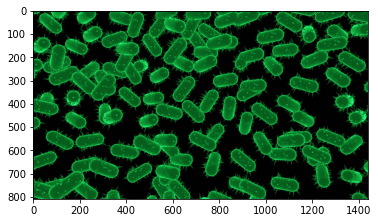

In [3]:
plt.imshow(image)
plt.show()

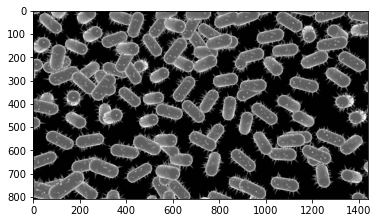

In [4]:
# La troisieme dimension est celle des couleurs 
# L'image contient :
# - une matrice de niveau de rouge 
# - une matrice de niveau de vert
# - une matrice de niveau de bleu
plt.imshow(image[:,:,1], cmap="gray")
plt.show()

In [5]:
image=image[:,:,1]

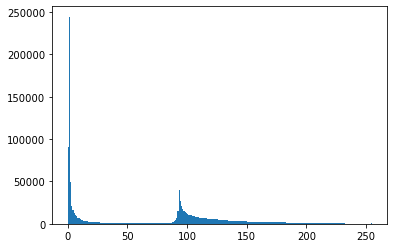

In [6]:
plt.hist(image.reshape(image.size), bins=255)
plt.show()

In [7]:
palier=75
image[image<palier]=0
image[image>=palier]=1

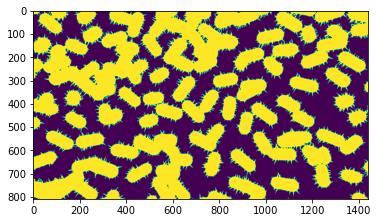

In [8]:
plt.imshow(image)
plt.show()

In [9]:
label_image, n_labels = ndimage.label(image)

In [10]:
n_labels

345

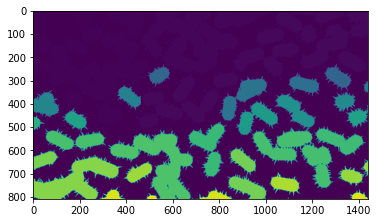

In [11]:
plt.imshow(label_image)
plt.show()

In [12]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(image, label_image, range(n_labels))

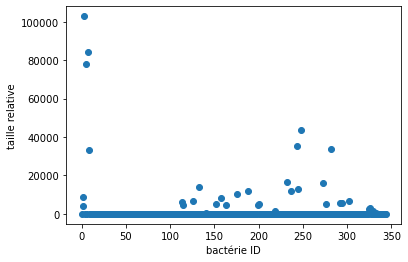

In [13]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()

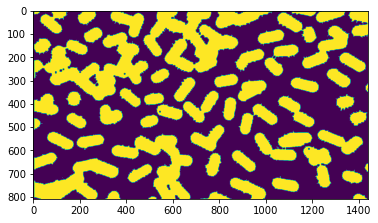

In [14]:
# Nous allons nettoyer l'image avec un peu d'érosion
erod_image = ndimage.binary_erosion(image,
                                    structure=np.ones((2,2)),
                                    iterations=5)
plt.imshow(erod_image)
plt.show()

In [15]:
label_image, n_labels = ndimage.label(erod_image)

In [16]:
n_labels

86

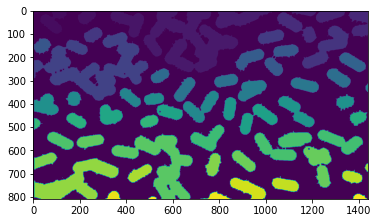

In [17]:
plt.imshow(label_image)
plt.show()

In [18]:
label_image, n_labels = ndimage.label(erod_image)

In [19]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(erod_image, label_image, range(n_labels))

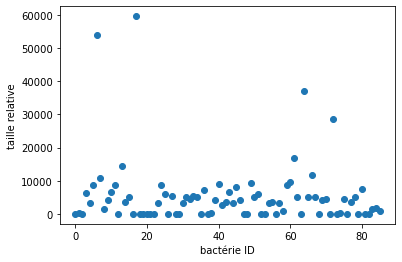

In [20]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()

# Detection de bord

In [21]:
bord_image_bad= ndimage.sobel(image)

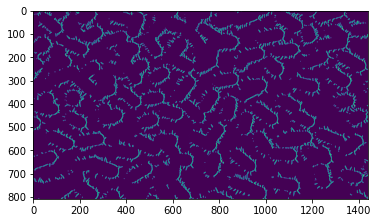

In [22]:
plt.imshow(bord_image_bad)
plt.show()

In [23]:
bord_image_good= ndimage.sobel(erod_image)

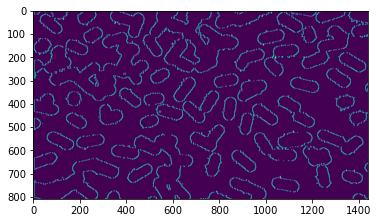

In [24]:
plt.imshow(bord_image_good)
plt.show()